<a href="https://colab.research.google.com/github/hosseynkebria/mv/blob/main/MV_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVT2 - Hosseyn Ahmady - 40240212001**

1.Import needed libraries such as torchvision , numpy , torch and PIL

In [ ]:
#MVT2 - Hosseyn Ahmady - 40240212001
from torchvision import transforms
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

2.A     Define Pathes of images

2.B     Open images

2.C     Plot images on subplot


Text(0.5, 1.0, '<INFRARED>')

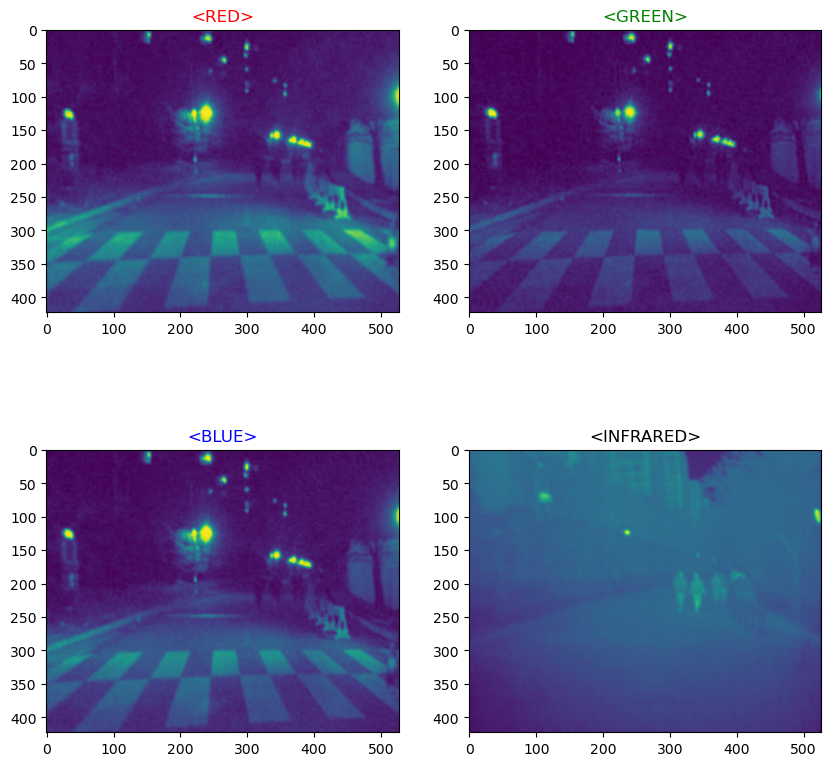

In [ ]:
#2.A
path_red_img    = 'R.png'
path_green_img  = 'G.png'
path_blue_img   = 'B.png'
path_IR_img     = 'IR.png'

#2.B
red_img = cv2.imread(path_red_img , cv2.IMREAD_GRAYSCALE)
green_img = cv2.imread(path_green_img , cv2.IMREAD_GRAYSCALE)
blue_img = cv2.imread(path_blue_img , cv2.IMREAD_GRAYSCALE)
IR_img = cv2.imread(path_IR_img , cv2.IMREAD_GRAYSCALE)

#2.C
fig, axarr = plt.subplots(2,2,figsize=(10,10))
axarr[0,0].imshow(red_img)
axarr[0,0].set_title('<RED>' , color='r' )

axarr[0,1].imshow(green_img)
axarr[0,1].set_title('<GREEN>' , color='g')

axarr[1,0].imshow(blue_img)
axarr[1,0].set_title('<BLUE>' , color='b')

axarr[1,1].imshow(IR_img)
axarr[1,1].set_title('<INFRARED>')

3.A Define **ToTensor** to transform PIL image to tensor.

3.B Print **size** of all images.
This results that all sizes are the same.

In [ ]:
#3.A
ToTensor = transforms.ToTensor()

red_img_tensor    = ToTensor(red_img)
green_img_tensor  = ToTensor(green_img)
blue_img_tensor   = ToTensor(blue_img)
IR_img_tensor     = ToTensor(IR_img)

#3.B
print(f'''
          Size of RED image   : {red_img_tensor.size()}
          Size of GREEN image : {green_img_tensor.size()}
          Size of BLUE image  : {blue_img_tensor.size()}
          Size of IR image    : {IR_img_tensor.size()}
        ''')


          Size of RED image   : torch.Size([1, 423, 527]) 
          Size of GREEN image : torch.Size([1, 423, 527])
          Size of BLUE image  : torch.Size([1, 423, 527]) 
          Size of IR image    : torch.Size([1, 423, 527])  
        


4.A Convert **Tensor** to **Numpy Array**.Changed the shape of arrays to 2D.Then print shape of these arrays.

4.B Used **cv2.merge** to merge all 4 images and used **cv2.convertScaleAbs** adjusting contrast (alpha) and brightness (beta).

4.C Subplot **merged_image** and **adjusted_image**.

4.D Print **shape** of two metioned images.


          Size of RED image   : (423, 527) 
          Size of GREEN image : (423, 527)
          Size of BLUE image  : (423, 527) 
          Size of IR image    : (423, 527)  
        
 	  ♦ Shape of merged images :  (423, 527, 4) 
	  ♦ Shape of adjusted image : (423, 527, 4)



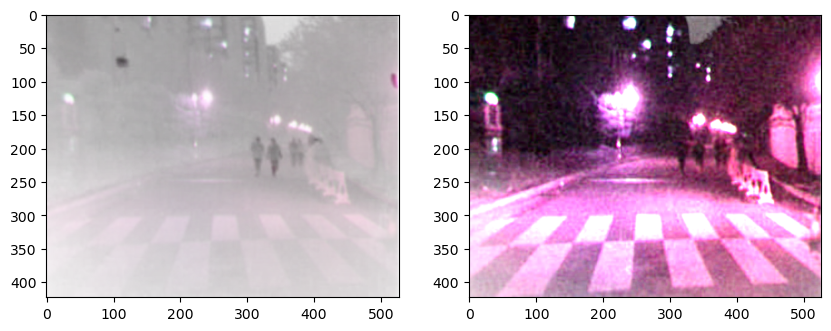

In [ ]:
#4.A
red_image_nparray   = red_img_tensor.numpy().reshape(423,527)
green_image_nparray = green_img_tensor.numpy().reshape(423,527)
blue_image_nparray  = blue_img_tensor.numpy().reshape(423,527)
IR_image_nparray    = IR_img_tensor.numpy().reshape(423,527)

print(f'''
          Size of RED image   : {red_image_nparray.shape}
          Size of GREEN image : {green_image_nparray.shape}
          Size of BLUE image  : {blue_image_nparray.shape}
          Size of IR image    : {IR_image_nparray.shape}
        ''')
#4.B
merged_image = cv2.merge([red_img,green_img,blue_img,IR_img])
adjusted_image = cv2.convertScaleAbs(merged_image,alpha=4)
#4.C
fig2, axis = plt.subplots(1,2,figsize=(10,10))

axis[1].imshow(adjusted_image)
axis[1].set_title = 'High Contrast'
axis[0].imshow(merged_image)
axis[0].set_title = 'Merged Image'

#4.D
print(f' \t  ♦ Shape of merged images :  {merged_image.shape} \n\t  ♦ Shape of adjusted image : {adjusted_image.shape}\n')

**5.I Principal Component Analysis** -source : https://www.askpython.com/python/examples/principal-component-analysis

- Define a function named PCA
- Subtract the **Mean** of each array of images so that images should be centered on the origin. Doing this to calculating the **Covariance** matrix.
- Calculate **Covariance** Matrix
- Compute the **Eigenvalues** and **Eigenvectors**
- **Sort** Eigenvalues in *descending* order
- Select a *subset* from the *rearranged* Eigenvalue matrix
- Transform the data by having a **dot product** between the **Transpose** of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

Size of Reshaped merged image : (222921, 4)
(222921, 1)


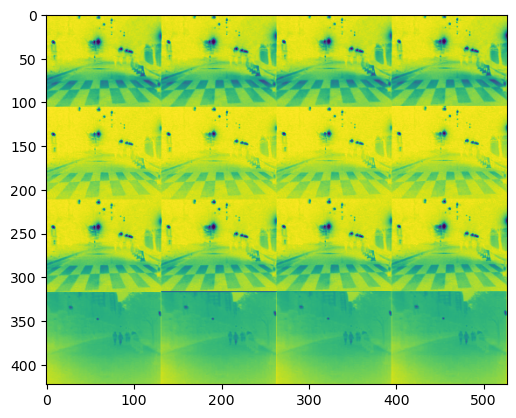

In [ ]:
#5.I
reshaped_merged_image = ToTensor(merged_image).numpy().reshape(423*527,4)
print(f'Size of Reshaped merged image : {reshaped_merged_image.shape}')

#I.A
def PCA_A(X ,num_components):

    #Step-1
    X_meaned = X - np.mean(X , axis = 0)

    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced


#B
first = PCA_A(reshaped_merged_image,1)
print(first.shape)
plt.imshow(first.reshape(423,527))

**5.II Use Sikit learn library to perform Principal Component Analysis (PCA)**

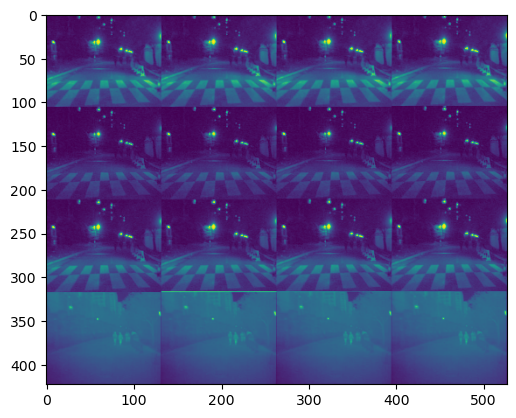

In [ ]:
#5.II
def pca_func(n_components , image):
      pca = PCA(n_components)

      principalComponents = pca.fit_transform(image)

      principalDf = pd.DataFrame(data = principalComponents
                  , columns = ['principal component'])

      return principalDf , principalComponents

second_df,second_array = pca_func(1,reshaped_merged_image)
plt.imshow(second_array.reshape(423,527))

**Implenting RANSAC**

1.Define a function for **RANSAC**.it takes **matches** , **keypoints1** , **keypoints2** , **n** , **k** , **t** , **d** and **outlier_ratio**

Parameters
- **matches**: list
            List of matched keypoints between two images.
        
- **keypoints1**: list
            Keypoints of the first image.
        
- **keypoints2**: list
            Keypoints of the second image.
        
- **n**: int
            Minimum number of matches required to compute the transformation.
       
- **k**: int
            Number of iterations.
        
- **t**: float
            Threshold to determine inliers.
        
- **d**: int
            Number of inliers required to assert that a transformation is valid.
        
- **outlier_ratio**: float, optional
            Ratio of outlier matches.
    
- ***Returns***:
        best_transform: numpy array
            Best transformation matrix.

2.Define another function named **merge_images**

Parameters:
- **images**: list
            List of input images.
- **transforms**: list
            List of transformation matrices for each image.
    
- **Returns**:
        panorama: numpy array
            Merged panorama image.

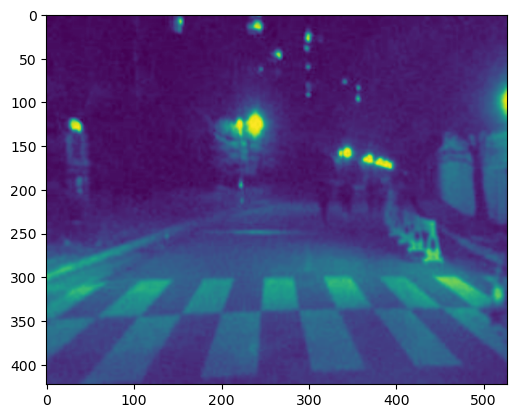

In [ ]:
def ransac_transform(matches, keypoints1, keypoints2, n, k, t, d, outlier_ratio=0.1):
    best_transform = None
    best_inliers = []

    num_outliers = int(len(matches) * outlier_ratio)

    for _ in range(k):
        # Randomly select a subset of matches
        indices = np.random.choice(len(matches), n, replace=False)
        subset_matches = [matches[i] for i in indices]

        # Extract corresponding keypoints
        src_points = np.float32([keypoints1[m.queryIdx].pt for m in subset_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([keypoints2[m.trainIdx].pt for m in subset_matches]).reshape(-1, 1, 2)

        # Compute transformation matrix
        transform, _ = cv2.estimateAffinePartial2D(src_points, dst_points)

        if transform is None:
            continue

        # Count inliers
        inliers = []
        for i, match in enumerate(matches):
            src_pt = np.array([keypoints1[match.queryIdx].pt], dtype=np.float32).reshape(-1, 1, 2)
            dst_pt = np.array([keypoints2[match.trainIdx].pt], dtype=np.float32).reshape(-1, 1, 2)
            transformed_pt = cv2.transform(src_pt, transform)
            distance = np.sqrt(np.sum((dst_pt - transformed_pt)**2))
            if distance < t:
                inliers.append(i)

        # Update best transformation if it has more inliers
        if len(inliers) > len(best_inliers):
            best_transform = transform
            best_inliers = inliers

    return best_transform

def merge_images(images, transforms):
    # Get dimensions of the input images
    height, width = images[0].shape[:2]

    # Compute the size of the output panorama
    panorama_width = width
    panorama_height = height

    # Create an empty canvas for the panorama
    panorama = np.zeros((panorama_height, panorama_width), dtype=np.uint8)

    # Paste the first image onto the canvas
    panorama[:height, :width] = images[0]

    # Apply transformations to merge subsequent images
    for i in range(1, len(images)):
        # Apply the transformation to the next image
        warped_img = cv2.warpAffine(images[i], transforms[i-1], (panorama_width, panorama_height))

        # Paste the transformed image onto the canvas
        panorama[:height, width:] = warped_img[:, width:]

    return panorama

# Find keypoints and descriptors for the images (using SIFT for example)
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(red_img, None)
keypoints2, descriptors2 = sift.detectAndCompute(green_img, None)
keypoints3, descriptors3 = sift.detectAndCompute(blue_img, None)
keypoints4, descriptors4 = sift.detectAndCompute(IR_img, None)

# Match keypoints between images
matcher = cv2.BFMatcher()
matches1_2 = matcher.match(descriptors1, descriptors2)
matches2_3 = matcher.match(descriptors2, descriptors3)
matches3_4 = matcher.match(descriptors3, descriptors4)

# Run RANSAC to compute transformations between images
transform1_2 = ransac_transform(matches1_2, keypoints1, keypoints2, n=4, k=1000, t=5, d=50, outlier_ratio=0.1)
transform2_3 = ransac_transform(matches2_3, keypoints2, keypoints3, n=4, k=1000, t=5, d=50, outlier_ratio=0.1)
transform3_4 = ransac_transform(matches3_4, keypoints3, keypoints4, n=4, k=1000, t=5, d=50, outlier_ratio=0.1)

# Check the dimensions of the transformations
# print("Transform 1_2 shape:", matches1_2.shape)

panorama = merge_images([red_img, green_img, blue_img, IR_img], [transform1_2, transform2_3, transform3_4])

plt.imshow(panorama)